In [1]:
import pandas as pd

In [2]:
file = r"C:\Users\Administrator\Downloads\synthetic_beverage_sales_data.csv"

In [3]:
df = pd.read_csv(file)

In [4]:
df.tail(5)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
8999905,ORD2999999,CUS7080,B2C,Schwip Schwap,Soft Drinks,1.27,2,0.0,2.54,Sachsen,2023-07-03
8999906,ORD2999999,CUS7080,B2C,San Pellegrino,Water,0.91,15,0.0,13.65,Sachsen,2023-07-03
8999907,ORD3000000,CUS6551,B2B,Red Bull,Soft Drinks,2.94,64,0.1,169.34,Sachsen-Anhalt,2022-04-09
8999908,ORD3000000,CUS6551,B2B,Passion Fruit Juice,Juices,4.04,79,0.1,287.24,Sachsen-Anhalt,2022-04-09
8999909,ORD3000000,CUS6551,B2B,Vittel,Water,0.38,9,0.1,3.08,Sachsen-Anhalt,2022-04-09


In [5]:
df.shape

(8999910, 11)

In [6]:
null_counts = df.isnull().sum()
print(null_counts)

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64


In [7]:
duplicates = df[df.duplicated()]

# Display duplicate rows
print(duplicates)

Empty DataFrame
Columns: [Order_ID, Customer_ID, Customer_Type, Product, Category, Unit_Price, Quantity, Discount, Total_Price, Region, Order_Date]
Index: []


In [9]:
# Select the relevant columns
columns = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']

# Check for null values
null_counts = df[columns].isnull().sum()

# Check for non-numeric values (strings)
non_numeric_counts = df[columns].apply(lambda x: x.apply(lambda y: not pd.to_numeric(y, errors='coerce')).sum())

# Display the counts of null values and non-numeric values
print("Null values in each column:")
print(null_counts)
print("\nNon-numeric values in each column:")
print(non_numeric_counts)

Null values in each column:
Unit_Price     0
Quantity       0
Discount       0
Total_Price    0
dtype: int64

Non-numeric values in each column:
Unit_Price           0
Quantity             0
Discount       5795405
Total_Price          0
dtype: int64


In [10]:
# Function to check if a value is numeric
def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Find rows where 'Discount' column has non-numeric values
non_numeric_rows = df[~df['Discount'].apply(is_numeric)]

# Display the rows
print("Rows where 'Discount' column has non-numeric values:")
print(non_numeric_rows)

Rows where 'Discount' column has non-numeric values:
Empty DataFrame
Columns: [Order_ID, Customer_ID, Customer_Type, Product, Category, Unit_Price, Quantity, Discount, Total_Price, Region, Order_Date]
Index: []


In [11]:
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Display the correlation matrix
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
             Unit_Price  Quantity  Discount  Total_Price
Unit_Price     1.000000  0.017295  0.003475     0.620649
Quantity       0.017295  1.000000  0.822110     0.313923
Discount       0.003475  0.822110  1.000000     0.248184
Total_Price    0.620649  0.313923  0.248184     1.000000


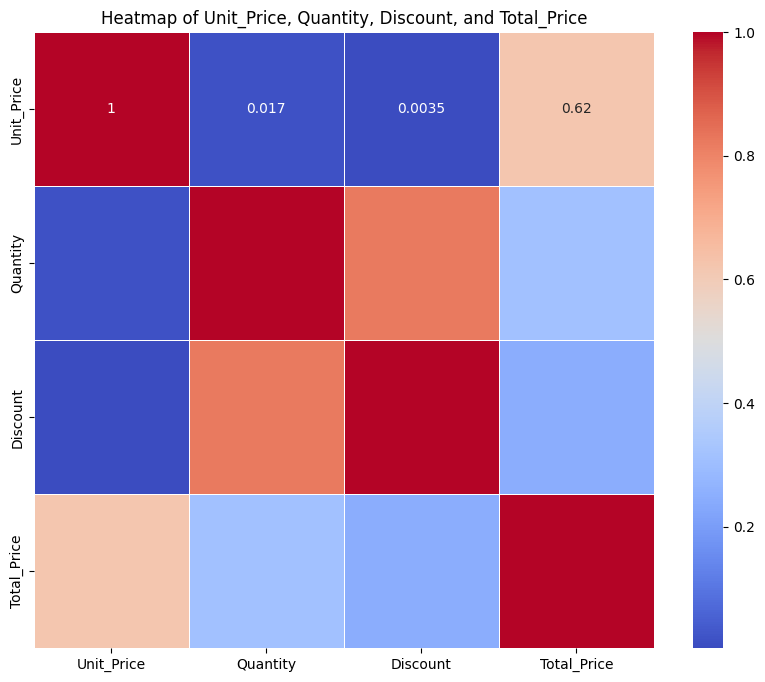

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming you have the correlation matrix as a DataFrame
corr_matrix = pd.DataFrame({
    'Unit_Price': [1, 0.017295, 0.003475, 0.620649],
    'Quantity': [0.017295, 1, 0.822110, 0.313923],
    'Discount': [0.003475, 0.822110, 1, 0.248184],
    'Total_Price': [0.620649, 0.313923, 0.248184, 1.000000]
}, index=['Unit_Price', 'Quantity', 'Discount', 'Total_Price'])

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Unit_Price, Quantity, Discount, and Total_Price')
plt.show()

In [13]:


# Group by 'Category' and 'Product', and sum the 'Quantity' for each group
grouped = df.groupby(['Category', 'Product'])['Quantity'].sum().reset_index()

# Find the product with the highest quantity in each category
most_famous_products = grouped.loc[grouped.groupby('Category')['Quantity'].idxmax()]

# Display the most famous products in each category
print("Most famous products in each category:")
print(most_famous_products)

Most famous products in each category:
               Category         Product  Quantity
2   Alcoholic Beverages          Beck's   3293475
21               Juices  Hohes C Orange   7794189
29          Soft Drinks      Fritz-Kola   5138738
41                Water  San Pellegrino   5934719


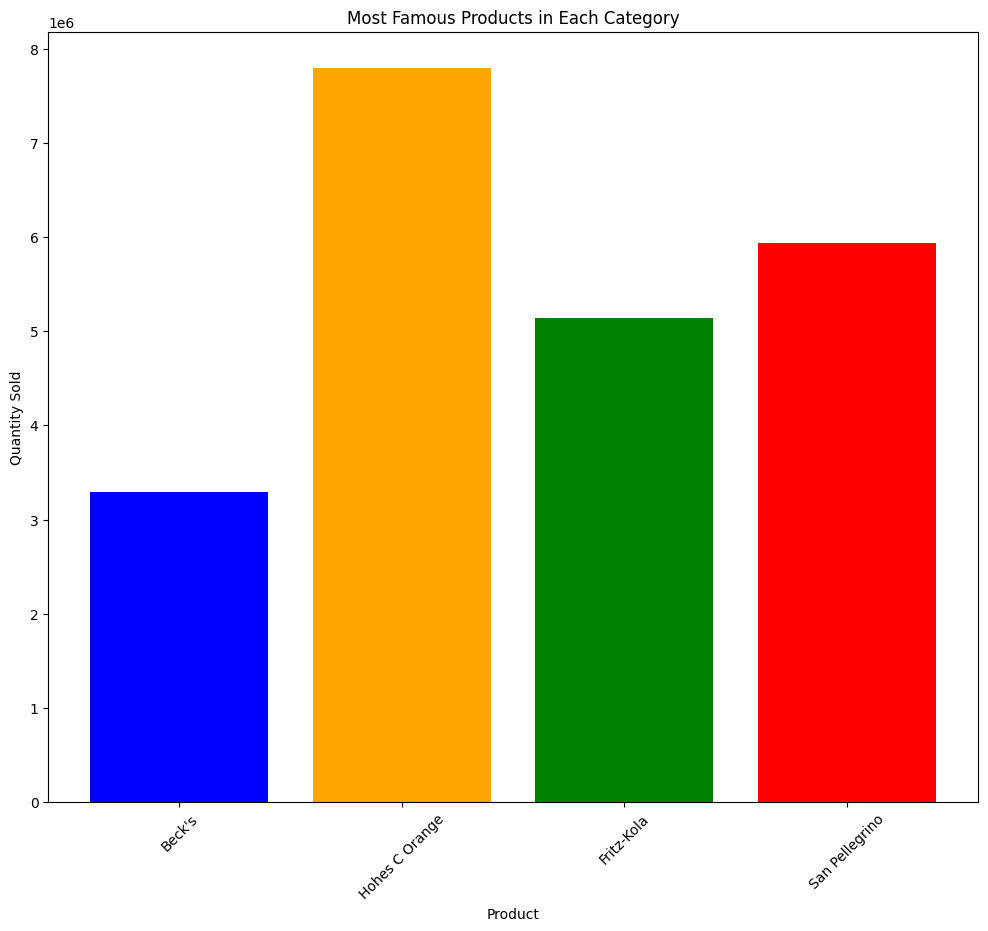

In [14]:
# Assuming you have the data as a DataFrame
data = {
    'Category': ['Alcoholic Beverages', 'Juices', 'Soft Drinks', 'Water'],
    'Product': ["Beck's", 'Hohes C Orange', 'Fritz-Kola', 'San Pellegrino'],
    'Quantity': [3293475, 7794189, 5138738, 5934719]
}
bar = pd.DataFrame(data)

# Create a bar graph
plt.figure(figsize=(12, 10))
plt.bar(bar['Product'], bar['Quantity'], color=['blue', 'orange', 'green', 'red'])

# Add labels and title
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.title('Most Famous Products in Each Category')
plt.xticks(rotation=45)
plt.show()

In [14]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming the previous steps are already done and you have X_train, X_test, y_train, y_test

# Train a Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators as needed
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

# Feature importance
importances = rf_clf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

Training Accuracy: 1.0
Test Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    640612
        True       1.00      1.00      1.00   1159370

    accuracy                           1.00   1799982
   macro avg       1.00      1.00      1.00   1799982
weighted avg       1.00      1.00      1.00   1799982


Feature Importances:
                         Feature    Importance
2                       Discount  5.297768e-01
1                       Quantity  3.114253e-01
3                    Total_Price  1.105276e-01
0                     Unit_Price  3.220561e-02
51  Category_Alcoholic Beverages  2.314961e-03
..                           ...           ...
65        Region_Rheinland-Pfalz  2.382324e-06
68         Region_Sachsen-Anhalt  6.519246e-07
59                 Region_Bremen  4.618046e-07
58            Region_Brandenburg  3.690496e-07
70              Region_Thüringen  2.989902e-07

[71 rows x 2 columns

In [15]:
# Group by 'Customer_Type' and 'Product', and count the occurrences
customer_product_counts = df.groupby(['Customer_Type', 'Product']).size().reset_index(name='Count')

# Display the result
print(customer_product_counts)

   Customer_Type       Product   Count
0            B2B   Apollinaris   88863
1            B2B    Augustiner   41087
2            B2B       Bacardi   40923
3            B2B        Beck's   50699
4            B2B    Chardonnay   41097
..           ...           ...     ...
89           B2C    Vio Wasser  159976
90           B2C        Vittel  164669
91           B2C        Volvic  160151
92           B2C  Volvic Touch  160501
93           B2C    Warsteiner   75545

[94 rows x 3 columns]


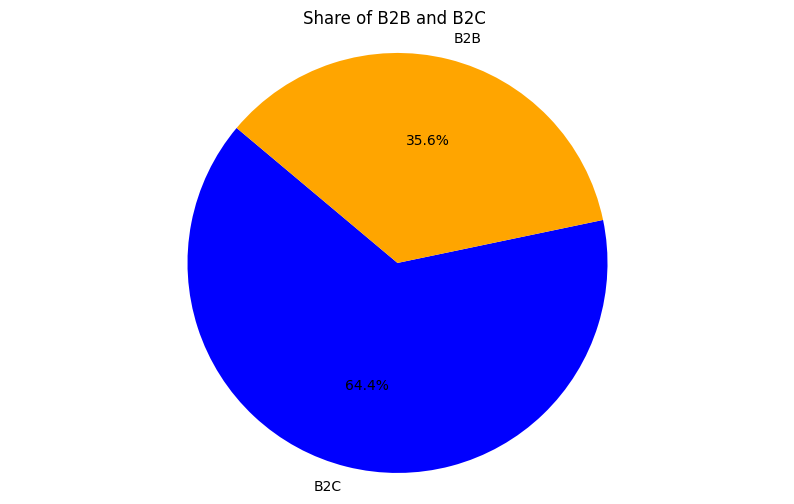

In [25]:

import matplotlib.pyplot as plt



# Group by 'Customer_Type' and count the occurrences
customer_type_counts = df['Customer_Type'].value_counts().reset_index()
customer_type_counts.columns = ['Customer_Type', 'Count']

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(customer_type_counts['Count'], labels=customer_type_counts['Customer_Type'], autopct='%1.1f%%', startangle=140, colors=['blue', 'orange'])

# Add title
plt.title('Share of B2B and B2C ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()

In [16]:
# Filter for B2B customer type
b2b_df = df[df['Customer_Type'] == 'B2B']

# Group by 'Product' and count the occurrences
b2b_product_counts = b2b_df.groupby('Product').size().reset_index(name='Count')

# Sort by count in descending order and select the top 7 products
top_7_b2b_products = b2b_product_counts.sort_values(by='Count', ascending=False).head(7)

# Display the result
print("Top 7 B2B products and their counts:")
print(top_7_b2b_products)


Top 7 B2B products and their counts:
                Product   Count
15       Hohes C Orange  119679
40         Tomato Juice  113947
7       Cranberry Juice  113669
13        Granini Apple  113660
27  Passion Fruit Juice  113502
21          Mango Juice  113100
29   Rauch Multivitamin  113080


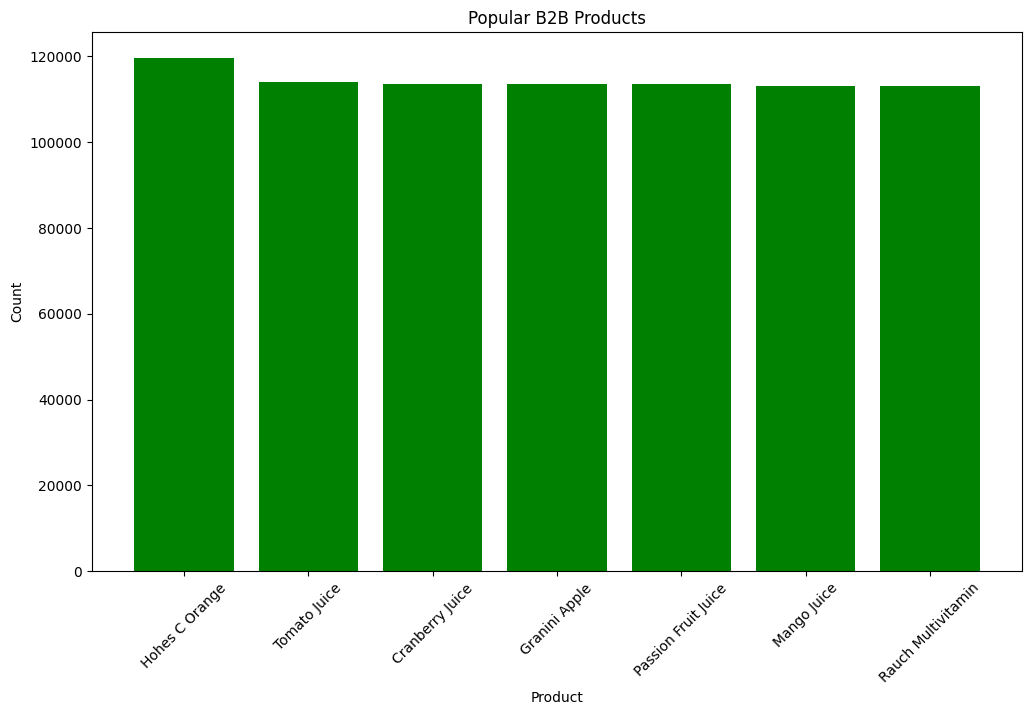

In [17]:

data = {
    'Product': ['Hohes C Orange', 'Tomato Juice', 'Cranberry Juice', 'Granini Apple', 'Passion Fruit Juice', 'Mango Juice', 'Rauch Multivitamin'],
    'Count': [119679, 113947, 113669, 113660, 113502, 113100, 113080]
}
top_7_b2b_products = pd.DataFrame(data)

# Create a bar graph
plt.figure(figsize=(12, 7))
plt.bar(top_7_b2b_products['Product'], top_7_b2b_products['Count'], color='green')

# Add labels and title
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Popular B2B Products')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Filter for B2B customer type
b2b_df = df[df['Customer_Type'] == 'B2C']

# Group by 'Product' and count the occurrences
b2b_product_counts = b2b_df.groupby('Product').size().reset_index(name='Count')

# Sort by count in descending order and select the top 7 products
top_7_b2b_products = b2b_product_counts.sort_values(by='Count', ascending=False).head(7)

# Display the result
print("Top 7 B2C products and their counts:")
print(top_7_b2b_products)


Top 7 B2C products and their counts:
                Product   Count
15       Hohes C Orange  217435
13        Granini Apple  205837
7       Cranberry Juice  205659
29   Rauch Multivitamin  205458
27  Passion Fruit Juice  205421
40         Tomato Juice  204826
21          Mango Juice  204664


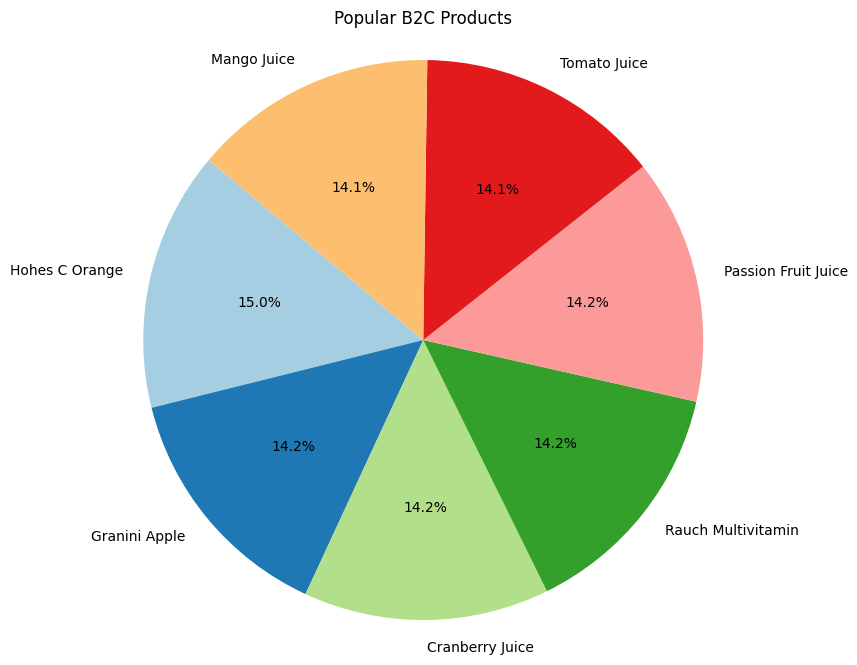

In [19]:

data = {
    'Product': ['Hohes C Orange', 'Granini Apple', 'Cranberry Juice', 'Rauch Multivitamin', 'Passion Fruit Juice', 'Tomato Juice', 'Mango Juice'],
    'Count': [217435, 205837, 205659, 205458, 205421, 204826, 204664]
}
top_7_b2c_products = pd.DataFrame(data)

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_7_b2c_products['Count'], labels=top_7_b2c_products['Product'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add title
plt.title('Popular B2C Products')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()

In [20]:


# Filter for B2C customer type
b2c_df = df[df['Customer_Type'] == 'B2C']

# List of top 7 B2C products
top_7_b2c_products = ['Hohes C Orange', 'Granini Apple', 'Cranberry Juice', 'Rauch Multivitamin', 'Passion Fruit Juice', 'Tomato Juice', 'Mango Juice']

# Filter the original B2C DataFrame for the top 7 products
top_7_b2c_df = b2c_df[b2c_df['Product'].isin(top_7_b2c_products)]

# Group by 'Product' and sum the 'Total_Price' for each of the top 7 B2C products
total_price_by_top_7_b2c = top_7_b2c_df.groupby('Product')['Total_Price'].sum().reset_index()

# Display the result
print("Total Price generated by each popular B2C product:")
print(total_price_by_top_7_b2c)

Total Price generated by each popular B2C product:
               Product  Total_Price
0      Cranberry Juice   5860585.41
1        Granini Apple   2705176.02
2       Hohes C Orange   3139015.44
3          Mango Juice   5269840.09
4  Passion Fruit Juice   4959277.13
5   Rauch Multivitamin   3914739.15
6         Tomato Juice   5448523.19


In [21]:

# Filter for B2B customer type
b2b_df = df[df['Customer_Type'] == 'B2B']

# List of top 7 B2B products
top_7_b2b_products = ['Hohes C Orange', 'Tomato Juice', 'Cranberry Juice', 'Granini Apple', 'Passion Fruit Juice', 'Mango Juice', 'Rauch Multivitamin']

# Filter the original B2B DataFrame for the top 7 products
top_7_b2b_df = b2b_df[b2b_df['Product'].isin(top_7_b2b_products)]

# Group by 'Product' and sum the 'Total_Price' for each of the top 7 B2B products
total_price_by_top_7_b2b = top_7_b2b_df.groupby('Product')['Total_Price'].sum().reset_index()

# Display the result
print("Total Price generated by each popular B2B product:")
print(total_price_by_top_7_b2b)

Total Price generated by each popular B2B product:
               Product  Total_Price
0      Cranberry Juice  17184245.57
1        Granini Apple   9966473.15
2       Hohes C Orange  11909201.55
3          Mango Juice  17122093.10
4  Passion Fruit Juice  17183869.55
5   Rauch Multivitamin  14194686.36
6         Tomato Juice  14310122.93


In [22]:


# Group by 'Product' and sum the 'Total_Price' for each product
product_total_price = df.groupby('Product')['Total_Price'].sum().reset_index()

# Sort by total price in descending order and select the top 7 products
top_7_products = product_total_price.sort_values(by='Total_Price', ascending=False).head(7)

# Display the result
print("Top 7 products with the highest total price:")
print(top_7_products)

Top 7 products with the highest total price:
           Product   Total_Price
41  Veuve Clicquot  2.025819e+08
26  Moët & Chandon  1.750881e+08
18  Johnnie Walker  9.726180e+07
16    Jack Daniels  9.588100e+07
39       Tanqueray  8.614366e+07
2          Bacardi  5.846750e+07
14     Havana Club  5.804696e+07


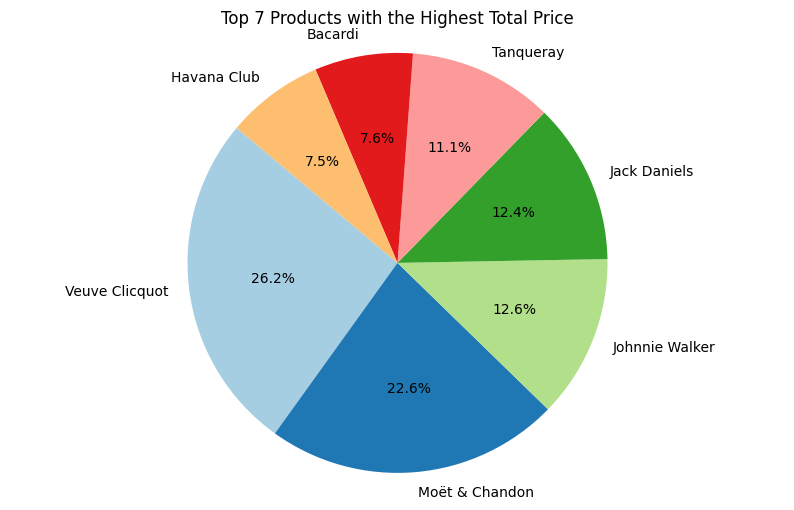

In [26]:


# Assuming you have the data as a DataFrame
data = {
    'Product': ['Veuve Clicquot', 'Moët & Chandon', 'Johnnie Walker', 'Jack Daniels', 'Tanqueray', 'Bacardi', 'Havana Club'],
    'Total_Price': [2.025819e+08, 1.750881e+08, 9.726180e+07, 9.588100e+07, 8.614366e+07, 5.846750e+07, 5.804696e+07]
}
top_7_products = pd.DataFrame(data)

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_7_products['Total_Price'], labels=top_7_products['Product'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add title
plt.title('Top 7 Products with the Highest Total Price')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()

In [27]:


# Group by 'Category' and sum the 'Total_Price' for each category
category_total_price = df.groupby('Category')['Total_Price'].sum().reset_index()

# Sort by total price in descending order and select the top 7 categories
top_7_categories = category_total_price.sort_values(by='Total_Price', ascending=False).head(7)

# Display the result
print("Top 7 categories with the highest total price:")
print(top_7_categories)

Top 7 categories with the highest total price:
              Category   Total_Price
0  Alcoholic Beverages  9.117979e+08
1               Juices  1.331678e+08
2          Soft Drinks  8.280254e+07
3                Water  4.891285e+07


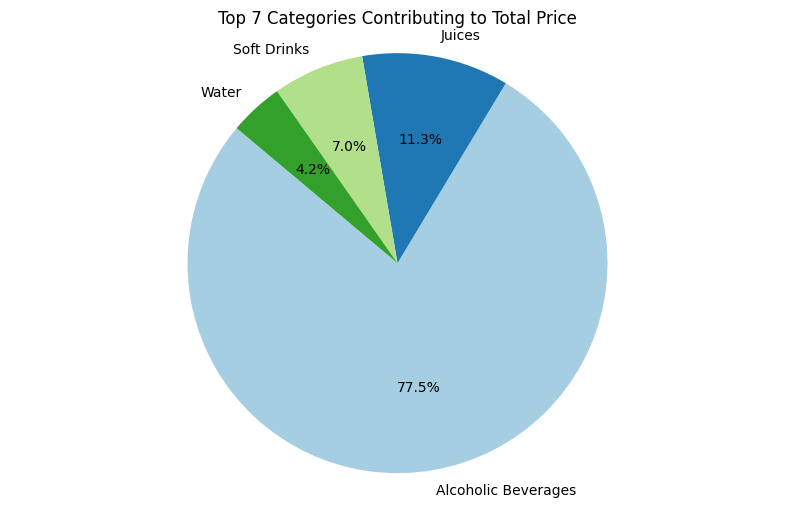

In [28]:



# Group by 'Category' and sum the 'Total_Price' for each category
category_total_price = df.groupby('Category')['Total_Price'].sum().reset_index()

# Sort by total price in descending order and select the top 7 categories
top_7_categories = category_total_price.sort_values(by='Total_Price', ascending=False).head(7)

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_7_categories['Total_Price'], labels=top_7_categories['Category'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add title
plt.title('Top 7 Categories Contributing to Total Price')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()